<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PNNPPV/notebooky/cv02-en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2nd Lab** - Linear algebra with NumPy, Fully connected neural network

In this notebook we will go over basic linear algebra operations with NumPy and build our own neural network from scratch.

#Linear Algebra with NumPy

To implement a fully connected neural network we will need to utlize matrix multiplication. 

## Matrix multiplication
The most important matrix operation we will use is matrix multipllication. We will start with a definition:

Let $\mathbf{A} \in \mathbb{R}^{m\times n}, \mathbf{B} \in \mathbb{R}^{n \times l}, \mathbf{C} \in \mathbb{R}^{m \times l} $ then $\mathbf{A}\mathbf{B} = \mathbf{C} \iff (\forall i \in \hat{m})(\forall j \in \hat{l})(c_{i,j} = \sum_{k=1}^{n} a_{i,k} \cdot b_{k,j})$ 

It is important to remember that we the first subscript of a matrix element indicates the row and the second one indicates column.

### Úloha 1 (On the whiteboard)

Calculate $\mathbf{A}\mathbf{B}$, $\mathbf{B}\mathbf{C}$, $\mathbf{C}\mathbf{B}$

$\mathbf{A} = \begin{bmatrix} 
3 & 5 & -1 \\
2 & -4 & 2
\end{bmatrix}$

$\mathbf{B} = \begin{bmatrix} 
5 & 2 & 1 \\
-6 & 5 & 2 \\
3 & 4 & -1
\end{bmatrix}$

$\mathbf{C} = \begin{bmatrix} 
4 & -4 & 3 \\
-6 & -3 & 4 \\
-1 & 1 & 0
\end{bmatrix}$

In NumPy we can multiply matrices by using np.matmul(a, b), or by using the @ operator. We can also use np.dot. The difference between these two approaches is in broadcasting. Test this out for $\mathbf{BC}$ a $\mathbf{CB}$

*Note:* Vectors can be though of as matrices with one of the dimensions being one. The singleton dimension determines whether it is a row or a column vector. Theoretically this affects the multiplication, but this might not be reflected in when working with NumPy. For example when using an array with len(np.shape) == 1 it is considered to be a row or a column vector based on what is better applicable in the current call.

In [ ]:
import numpy as np
a = np.array([[3,5,-1],[2,-4,2]])
b = np.array([[5,2,1],[-6,5,2],[3,4,-1]])
print(np.matmul(a,b))
d = a @ b
print(d)
v = np.array([10,20,30])
print(v.shape)
u = np.array([5,25])
print(u.shape)
print(a @ v)
print(u @ a)


[[-18  27  14]
 [ 40  -8  -8]]
[[-18  27  14]
 [ 40  -8  -8]]
(3,)
(2,)
[100   0]
[ 65 -75  45]


If we try to multiply a tensor of rank greater than 2 matmul will consider it as a list of matrices. If we need to perform something more fancy we can utilize np.einsum.



## Scalar multiplication

We can easily multiply a matrix by a scalar. This can be done with either np.multiply or with the * operator. If both of the operands are tensors then the multiplication will be carried out elementwise with broadcasting if applicable.

In [ ]:
print(a * d)
print(5 * a)

[[-54 135 -14]
 [ 80  32 -16]]
[[ 15  25  -5]
 [ 10 -20  10]]


## Transposed matrices

Definition: Let $\mathbf{A} \in \mathbb{R}^{m,n}$ then $\mathbf{A}^T \in \mathbb{R}^{n,m}$ is its transposed matrix $\iff (\forall i \in \hat{m})(\forall j \in \hat{n})(a_{i,j} = a^T_{j,i})$ 

In NumPy we simply call the the method .T of any np.array. We can also use the function np.transpose. We can also use this to convert a row vector to a column vector and vice versa.

In [ ]:
print(a.T)
print(np.transpose(a))

r = np.array([[100,10,1]])
print(r.shape)

c = np.array([[3],[7],[8]])
print(c.shape)

print(a @ c)
print(a @ r.T)



[[ 3  2]
 [ 5 -4]
 [-1  2]]
[[ 3  2]
 [ 5 -4]
 [-1  2]]
(1, 3)
(3, 1)
[[36]
 [-6]]
[[349]
 [162]]


# Fully connected neural networks
A neural network is a biologically inspired model used to perform various functions. Today we will use it as classifier.

In general, we model the network as an orientede graph with valued edges nodes of which are the so-called neurons. Every neuron has its own activation, which is computed based on activations of neurons it is connected to. Any activation can then also affect further neurons. In the most general case we can describe the network activations as:

$$a_p = f \left( \sum_{q \in p_{in}} w_{p,q} a_q + b_p \right) = f\left(z_p\right),$$

where $a_p$ is the activation of a given node, $w_{p,q}$ is the weight between the node $q$ and $p$, $b_p$ is the bias of the node $p$, $f$ is the activation function, $z_p$ is a simplified expression we will use later. When using this broad definition it is possible for the neurons to be connected in a cyclic way which is undesirable. We also do not want the structure of the network to be too complicated. We will therefore introduce a fully connected neural network sometimes also denoted as a Multi-Layer-Perceptron. The added structure lies in the fact that every neuron has belongs to a layer and each neuron in a layer receives its inputs from all of the neurons in the previous layer.

![Fully connected neural network](https://raw.githubusercontent.com/kocurvik/edu/master/PNNPPV/supplementary/ntb_images/NN1.jpg)

Activations in the network can be then expressed as:

$$a_j^l = f \left( \sum_{k} a_k^{l-1} w_{k,j}^l + b_j^l \right) = f \left(z_j^l \right),$$

or in vector form:

$$a^l = f \left( a^{l-1}w^l + b^l \right) =  f \left(z^l \right),$$

where $a^l$ is the **row** vector of activations, $w^l$ is a weight matrix if $size(l-1) \times size(l)$, $a_l$ is a **column** vector of biases, $f$ is the scalar activation function, which is applied elementwise in the vector case, $z_l$ is also a row vector which is useful for simplifying expressions. The superscript indicates which layer the neuron belongs to.

For a better understanding see the following images:

![Indexy aktivácie a prahu](https://raw.githubusercontent.com/kocurvik/edu/master/PNNPPV/supplementary/ntb_images/activation_bias.jpg)
![Indexy váh](https://raw.githubusercontent.com/kocurvik/edu/master/PNNPPV/supplementary/ntb_images/weight.jpg)

*Note.:* The vectors could also be column vectors (this would result in the weight matrix being transposed), but this would create a few problems during implementation which arise due to broadcasting.






### Activation functions

We can use various activation functions. Today we will only use the sigmoid, but in future we will also use the other ones.

1. Sigmoid: $f(z) = \frac{1}{1 + e^{-z}}$
2. Tanh: $f(z) = tanh(z)$
3. ReLU: $f(z) = max(x,0)$
4. SoftPlus: $f(z) = ln(1 + e^z)$
5. LeakyReLU: $f(z) = max(x,ax), a \le 1$


### Interpreting the last layer

Our goal for this exercise is classification. Therefore we will interpret the last layer as numeric means of classification. If we intend to only classify our data into two classes we could only use one neuron with the sigmoid activation in the final layer. If the neuron outputs values less than 0.5 we will consider the input to be classified as the first class and if the output is greater than 0.5 we will consider the input to be classified as the second class.

With more $n \gt 2$ classes we need more neurons. We can use the rule $k = {argmax}_{i \in \hat{n}}(a_i^L(x))$, where $L$ is the amount of layers in our netowork, $x$ is the input vecor $n$ is the amount of classes and $k$ is the class determined by the classifier.

A bit more sophisticated approach is for example the softmax layer at the end instead of the standard activation. $P(k|x) = \frac{e^{z^L_k(x)}}{\sum_{i \in \hat n} e^{z^L_i(x)}}$, where $P(k|x)$ is the probability, that for the input $x$ the correct class is $k$. 


## Training

Our model is so far nice, but we need to be able to find the activations which make it work. To do that we need to train the model using training data. We will use pairs $\left(x, y\right)$, where $x$ is the input and $y$ is the vector denoting the correct class. We will represent the output vector with **one-hot** encoding so that the vector $y$ will contain 1 in the $k$-th position and zeros everywhere else.


### Loss function

Training is similar to general optimization. We wanto to find the network paramters (in our cas $w$ and $b$) which will work best for our problem. To do this we will optimize for the value of so-called loss function. Ideally we construct the loss function in such a way in which a high loss value on some data indicates that the network is performing badly. We also want the loss function to be differentiable. Today we will use these functions for $N$ pairs of $\left(x^i, y^i\right)$:

1. MSE: $C = \frac{1}{N} \sum_i ||a^L(x^i) - y^i||_2^2$, where $||v||_2$ is the L2 norm of $v$.
2. Cross-Entropy:  $C = -\frac{1}{N} \sum_{i,j} y_j^i ln\left(a_j^L(x)\right) + \left(1-y_j^i\right) ln\left(1 - a_i^L(x) \right)$
3. CE + Softmax: $C = \frac{1}{N} ln(z_y^L(x))$, where $z_y^L(x)$ is the element o $z^L(x)$, for which the class is correct. 


### Gradient descent

For optimization we will use a simple gradient descent rule with a step $\eta$ for parameter $p$ and loss function $C$.

$$p := p - \eta \frac{\partial C}{\partial p}$$



### SGD

In each step of training we will use a random subset of the training data. In the following step we will use a different subset and so on. The subsets are called minibatches. This benefits the training since we introduce noise into the optimization process which can help us get out of local minima. Also the found minimum may have some desirable properties as opposed to standard optimization. This also reduces the necessary spatial requirements of our algorithm which is often the most limiting factor when dealing with neural networks.

This approach is called **stochastic gradient descent (SGD)**.

*Note:* By choosing a minibatch we are actually approximating the function $C$ for the whole training set. Statistically the error of this estimation decreases with  $\sim \frac{1}{\sqrt{M}}$, where $M$ is the size of the minibatch. Therefore it is not necessarily a good idea to use large minibatches even when the memory would be underutilized.

### Calculating partial derivatives

We will now derive how to calculate the partial derivatives for the parameters of our fully connected neural network.

Let us first define a helper variable:

$ d_i^l = \frac{\partial C}{\partial z_i^l}$

Based on the choice of $C$ the $\odot$ operator means elementwise multiplication (* in NumPy).

for MSE: $d_i^L = (a_i^L - y_i) \cdot f^{'} (z_i^L)$, 

for CE: $d_i^L = (a_i^L - y_i)$

MSE (vectorized): $d_i^L = (a^L - y) \odot f^{'} (z^L)$

CE (vectorized): $d^L = a^L - y$

Based on $d^{l+1}$ we can compute $d^l$. This approach is also called **backpropagation** since the gradient is calculated in the opposite order as when calculating the values in forward calculation of activations.

$ d^l = \left(d^{l+1} \left( w^{l+1} \right)^T\right) \odot f^{'}(z^l)$

Proof:

$z_j^{l+1} = \sum_k \left( f \left( z^l_k\right) w_{kj}^{l+1} \right) + b_j^{l+1}$

$\frac{\partial z_j^{l+1}}{\partial z_k^l} = f^{'} \left( z^l_k\right) w_{kj}^{l+1}$

$d_k^l = \frac{\partial C}{\partial z_k^l} = \sum_j \frac{\partial C}{\partial z_j^{l+1}} \frac{\partial z_j^{l+1}}{\partial z_k^l} = \sum_j d_j^{l+1} f^{'} \left( z^l_k\right) w_{kj}^l$

For the network parameters:

$\frac{\partial C}{\partial b_j^l} = d_j^l$

$\frac{\partial C}{\partial w_{kj}^l} = d_j^l a_k^{l-1}$

Vectorized:

$\frac{\partial C}{\partial b^l} = d^l$

$\frac{\partial C}{\partial w_{}^l} = (a^{l-1})^T d^l $

Proof:

$z_j^l = \sum_k a_k^{l-1} w_{kj}^l + b_j^l$

$\frac{\partial C}{\partial b_j^l} = \sum_k \frac{\partial C}{\partial z_k^l}\frac{\partial z_k^l}{\partial b_j^l} = \sum_k \delta_{kj} d_k^l = d_j^l$

$\frac{\partial C}{\partial w_{kj}^l} = \sum_p \frac{\partial C}{\partial z_p^l}\frac{\partial z_p^l}{\partial w_{kj}^l} = \sum_p d_p^l \delta_{pj} a_k^{l-1} = d_j^l a_k^{l-1}$  

where $\delta_{jk} = 1$ if $j = k$, otherwise $ 0$.

### Algorithm

One step of our SGD algorithm is then:
1. We perform the forward computation - we save $z^l$ and $a^l$ values.
2. We calculate $d^L$ based on the loss function.
3. We backpropagate the error $d^l$ using the backpropagation rule.
4. We compute the partial derivatives from the previous step.
5. We repeat this for the whole minibatch and average the partial derivatives in order to update the parameter values according to the gradient descent rules.
  
**Attention:** it is still important to initialize the parameters correctly. If we initialize all of them to the same values all of the partial derivatives will be the same and the network will thus be unable to create represantations which require more than one neuron per layer.

## Implementation

The following code contains the implementation of the base algorithm structure. Some of the code is missing and your job will be to implement the missing code segments. Instructions along with some test are presented below.

In [ ]:
import numpy as np

def sigmoid(z):
    # returns the value after applying the sigmoid function
    return 1/(1+np.exp(-z))

def sigmoid_prime(z):
    # vráti the gradient of the sigmoid function
    return sigmoid(z)*(1-sigmoid(z))

def get_one_hot(targets, nb_classes):
    # returns the one-hot encoded vector in the sape it was loaded in
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

class Network():
    def __init__(self, arg):
        if isinstance(arg, str):
            # If our input is string we load a file
            self.load(arg)
        else:
            # Othewise we expect a list and use it to initialize the layers
            if len(arg) < 2:
                raise ValueError("Sizes must be at least 2!")

            self.w_list = []
            self.b_list = []
            # Here we initialize the weights
            for i in range(1, len(arg)):
                self.w_list.append(np.random.randn(arg[i - 1], arg[i]))
                self.b_list.append(0.1 * np.ones((arg[i])))

    def save(self, filename):
        # saves the network as a numpy file
        dict = np.array([self.w_list, self.b_list])
        np.save(filename, dict)

    def load(self, filename):
        # loads the network from a numpy file
        d = np.load(filename, allow_pickle=True)
        self.w_list = d[0].tolist()
        self.b_list = d[1].tolist()

    def fwd(self, a):
        # implement the forward pass
        for i in range(len(self.w_list)):
          a = sigmoid(a @ self.w_list[i] + self.b_list[i])
        return a

    def _step(self, X, y, batch_size, eta):
        # fill these lists with new values after one step
        new_w_list = [np.empty_like(w) for w in self.w_list]
        new_b_list = [np.empty_like(b) for b in self.b_list]


        # It is important to first perform the forward pass through the network
        # while remembering the values of a and z. It is possible that 
        # len(a_list) = len(z_list) + 1, since the first a is our input
        # This needs to be taken into consideration when idexing, but you can
        # also implement this in another way

        # Here we first fill the a_list and z_list

        z_list = list()
        a = X
        a_list = []
        for i in range(len(self.w_list)):
          z_list.append(a @ self.w_list[i] + self.b_list[i])
          a = sigmoid(z_list[i])
          a_list.append(a)
          


        # We calculate the error for a given step

        err = (1/batch_size)*np.sum((a_list[-1]-y)**2)
        d_list = [[] for _ in z_list]

        # Computing d^L based on the loss function chosen
        d_list[-1] = (a_list[-1] - y)*(sigmoid_prime(z_list[-1]))
        # backprop of d
        for k in range(2,len(d_list)):
          d_list[-k] =(d_list[-k+1]@(self.w_list[-k+1].T))*sigmoid_prime(z_list[-k])

        # writing into new_w_list and new_b_list based on SGD

        for i in range(len(new_b_list)):
          new_w_list = self.w_list[i] - (eta/batch_size) * a_list[i].T @ d_list[i]
          new_b_list = self.b_list[i] - (eta/batch_size) * d_list[i+1]

        self.w_list = new_w_list
        self.b_list = new_b_list
        return err

    def eval(self, X, y):
        # This method runs the network on input X and calculates the output
        
        # Note: in a realistic case we would implement this to run on smaller
        # chunks of data, but since our model is small we can simply do it at once
        out = self.fwd(X)
        err = np.mean((out - y)**2)
        out_best = np.argmax(out, axis=-1)
        y_best = np.argmax(y, axis=-1)
        acc = np.sum(np.where(out_best == y_best, 1, 0))/y.shape[0]
        return acc, err

    def sgd(self, X, y, val_X, val_y, epochs, steps, batch_size, eta):
        for epoch in range(epochs):
            err_tot = 0
            for step in range(steps):
                batch_mask = np.random.choice(X.shape[0], batch_size)
                batch_X = X[batch_mask,:]
                batch_y = y[batch_mask,:]
                err = self._step(batch_X, batch_y, batch_size, eta)
                if step == 0:
                    err_tot = err
                else:
                    err_tot = 0.1 * err + 0.9 * err_tot
                print("At step: {}, running average training error: {}".format(step, err_tot))

            acc, err = self.eval(val_X, val_y)
            print("At Epoch {}, validation error: {}, validation accuracy {}".format(epoch, err, acc))

### Exercise 2

Implement the function sigmoid which applies the activation function on the input in an elementwise fashion.


$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Implemnt the derivative as well.

$$\sigma (z)^{'} = \sigma (z)\left(1 - \sigma (z) \right)$$



In [ ]:
assert(sigmoid(0) == 0.5)
assert(sigmoid(50) > 1.0-1e-10)
assert(sigmoid(-50) <= 2e-22)
assert((sigmoid(np.array([10, 20]))==np.array([sigmoid(10), sigmoid(20)])).all())
assert(sigmoid_prime(0) == 0.25)
assert(sigmoid_prime(-50) > 0 )
assert(sigmoid_prime(30) > 0 )

### Exercise 3

Load the MNIST data and feed some of the images to the network.

We will first load the dataset and display one of the images.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist.data.astype('float32')/255
y = mnist.target.astype('int64')

5


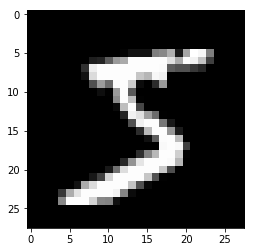

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(X[0,],(28,28)), cmap='gray')
print(y[0])

Implement the fwd method. The first test checks the dimension and the second one loads a pre-trained network and runs it on the MNIST dataset.

In [ ]:
net = Network([28*28,30,20,10])
out = net.fwd(np.random.randn(32,784))
assert(out.shape == (32,10))
print("Passed")

Prvý test prešiel


In [ ]:
!wget https://github.com/kocurvik/edu/raw/master/PNNPPV/supplementary/test_net.npy

--2019-10-02 15:27:55--  https://github.com/kocurvik/edu/raw/master/PNNPPV/supplementary/test_net.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kocurvik/edu/master/PNNPPV/supplementary/test_net.npy [following]
--2019-10-02 15:27:55--  https://raw.githubusercontent.com/kocurvik/edu/master/PNNPPV/supplementary/test_net.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304267 (297K) [application/octet-stream]
Saving to: ‘test_net.npy’

test_net.npy        100%[===================>] 297.14K  --.-KB/s    in 0.06s   

2019-10-02 15:27:56 (4.90 MB/s) - ‘test_net.npy’ saved [304267/304267]



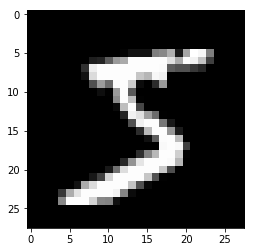

[9.37229037e-04 2.66838142e-04 2.75842143e-05 9.41889344e-03
 2.84101542e-08 3.63257568e-01 1.62064850e-07 8.06202488e-05
 7.02270024e-04 6.57032697e-04]
5


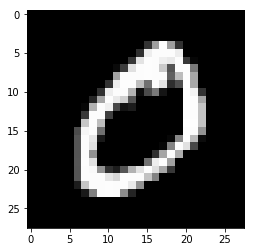

[9.94378188e-01 4.89519245e-07 3.28816149e-05 8.06781030e-05
 6.55497717e-06 4.25255977e-05 1.82384777e-04 7.61480364e-04
 2.06510936e-05 1.62541578e-03]
0


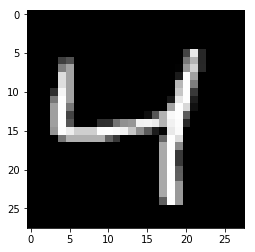

[1.53046899e-05 1.98120978e-04 1.47761151e-03 6.18961861e-05
 5.35841113e-01 1.93294785e-06 6.89669687e-06 3.71849632e-02
 4.93958997e-05 2.59638688e-02]
4
Druhý test prešiel!


In [ ]:
net = Network("test_net.npy")

R = net.fwd(X[0:3,:])

correct_list = []

for i in range(3):
  plt.imshow(np.reshape(X[i,:],(28,28)), cmap = 'gray')
  plt.show()
  print(R[i])
  print(np.argmax(R[i,:]))
  
print("Passed!")

### Exercise 4 
Implement the _step method, which performs SGD for MSE or CE loss function. This method won't be tested directly, but we will try to apply it to training. These parameters should work well enough so that the network learns at least something.

In [ ]:
train_X = X[:50000, :]
train_y = get_one_hot(y[:50000], 10)


val_X = X[50000:60000,:]
val_y = get_one_hot(y[50000:60000],10)
#
net = Network([28*28,30,20,10])
net.sgd(train_X, train_y, val_X, val_y, 10, 10000, 32, 0.01)
net.sgd(train_X, train_y, val_X, val_y, 10, 10000, 32, 0.03)
net.sgd(train_X, train_y, val_X, val_y, 10, 10000, 32, 0.001)
net.save("net.npy")

ValueError: ignored

We can also evaluate the network!

In [ ]:
R = net.fwd(X[60000:60010,:])

for i in range(10):
  plt.imshow(np.reshape(X[60000 + i,:],(28,28)), cmap = 'gray')
  plt.show()
  print(R[i])
  print(np.argmax(R[i,:]))